In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Datensatz.csv")

C:\Users\Florian\AppData\Local\Temp\ipykernel_7928\668810773.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datensatz.csv")


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
Y = df[["winningTeam", 'minute']]
X = df[['minute',
       'player1_xp', 'player1_totalGold', 'player1_totalDamageDoneToChampions',
       'player1_totalDamageTaken', 'player1_level', 'player1_currentGold',
       'player1_minionsKilled', 'player1_jungleMinionsKilled', 'player2_xp',
       'player2_totalGold', 'player2_totalDamageDoneToChampions',
       'player2_totalDamageTaken', 'player2_level', 'player2_currentGold',
       'player2_minionsKilled', 'player2_jungleMinionsKilled', 'player3_xp',
       'player3_totalGold', 'player3_totalDamageDoneToChampions',
       'player3_totalDamageTaken', 'player3_level', 'player3_currentGold',
       'player3_minionsKilled', 'player3_jungleMinionsKilled', 'player4_xp',
       'player4_totalGold', 'player4_totalDamageDoneToChampions',
       'player4_totalDamageTaken', 'player4_level', 'player4_currentGold',
       'player4_minionsKilled', 'player4_jungleMinionsKilled', 'player5_xp',
       'player5_totalGold', 'player5_totalDamageDoneToChampions',
       'player5_totalDamageTaken', 'player5_level', 'player5_currentGold',
       'player5_minionsKilled', 'player5_jungleMinionsKilled', 'player6_xp',
       'player6_totalGold', 'player6_totalDamageDoneToChampions',
       'player6_totalDamageTaken', 'player6_level', 'player6_currentGold',
       'player6_minionsKilled', 'player6_jungleMinionsKilled', 'player7_xp',
       'player7_totalGold', 'player7_totalDamageDoneToChampions',
       'player7_totalDamageTaken', 'player7_level', 'player7_currentGold',
       'player7_minionsKilled', 'player7_jungleMinionsKilled', 'player8_xp',
       'player8_totalGold', 'player8_totalDamageDoneToChampions',
       'player8_totalDamageTaken', 'player8_level', 'player8_currentGold',
       'player8_minionsKilled', 'player8_jungleMinionsKilled', 'player9_xp',
       'player9_totalGold', 'player9_totalDamageDoneToChampions',
       'player9_totalDamageTaken', 'player9_level', 'player9_currentGold',
       'player9_minionsKilled', 'player9_jungleMinionsKilled', 'player10_xp',
       'player10_totalGold', 'player10_totalDamageDoneToChampions',
       'player10_totalDamageTaken', 'player10_level', 'player10_currentGold',
       'player10_minionsKilled', 'player10_jungleMinionsKilled']]

In [5]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3, random_state=42, shuffle=True) 

Das Testdatenset wird aufgeteilt, um zu sehen wie die Vorhersage je nach Spieldauer ist.

In [6]:
y_train.drop(columns="minute", inplace=True)

## Lineare Regression

In [7]:
#x_test_wo_minute = x_test.drop["minute"]
regressor = LinearRegression()  
regressor.fit(x_train, y_train["winningTeam"])
y_pred = regressor.predict(x_test)

print('Model accuracy score with Linear-Regression : {0:0.4f}'. format(accuracy_score(y_test["winningTeam"], y_pred.round())))

Model accuracy score with Linear-Regression : 0.7141


In [8]:
x_test_0_4 = x_test.loc[x_test["minute"] < 5]
x_test_5_9 = x_test.loc[(x_test["minute"] >= 5) & (x_test["minute"] < 10)]
x_test_10_14 = x_test.loc[(x_test["minute"] >= 10) & (x_test["minute"] < 15)]
x_test_15_19 = x_test.loc[(x_test["minute"] >= 15) & (x_test["minute"] < 20)]
x_test_20_24 = x_test.loc[(x_test["minute"] >= 20) & (x_test["minute"] < 25)]
x_test_25_29 = x_test.loc[(x_test["minute"] >= 25) & (x_test["minute"] < 30)]
x_test_30_34 = x_test.loc[x_test["minute"] >= 30]

#get only winning team for specific time intervalls
y_test_0_4 = y_test.loc[y_test["minute"] < 5]["winningTeam"]
y_test_5_9 = y_test.loc[(y_test["minute"] >= 5) & (y_test["minute"] < 10)]["winningTeam"]
y_test_10_14 = y_test.loc[(y_test["minute"] >= 10) & (y_test["minute"] < 15)]["winningTeam"]
y_test_15_19 = y_test.loc[(y_test["minute"] >= 15) & (y_test["minute"] < 20)]["winningTeam"]
y_test_20_24 = y_test.loc[(y_test["minute"] >= 20) & (y_test["minute"] < 25)]["winningTeam"]
y_test_25_29 = y_test.loc[(y_test["minute"] >= 25) & (y_test["minute"] < 30)]["winningTeam"]
y_test_30_34 = y_test.loc[y_test["minute"] >= 30]["winningTeam"]

In [9]:
#create array with results
results_lr = np.empty(7)

y_pred_4 = regressor.predict(x_test_0_4)
results_lr[0] = accuracy_score(y_test_0_4, y_pred_4.round())
y_pred_9 = regressor.predict(x_test_5_9)
results_lr[1] = accuracy_score(y_test_5_9, y_pred_9.round())                            
y_pred_14 = regressor.predict(x_test_10_14)
results_lr[2] = accuracy_score(y_test_10_14, y_pred_14.round())
y_pred_19 = regressor.predict(x_test_15_19)
results_lr[3] = accuracy_score(y_test_15_19, y_pred_19.round())
y_pred_24 = regressor.predict(x_test_20_24)
results_lr[4] = accuracy_score(y_test_20_24, y_pred_24.round())
y_pred_29 = regressor.predict(x_test_25_29)
results_lr[5] = accuracy_score(y_test_25_29, y_pred_29.round())
y_pred_30_and_more = regressor.predict(x_test_30_34)
results_lr[6] = accuracy_score(y_test_30_34, y_pred_30_and_more.round())


#create df with results
#x_ticks = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

df_lr_results = pd.DataFrame(results_lr)
df_lr_results["x_ticks"] = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

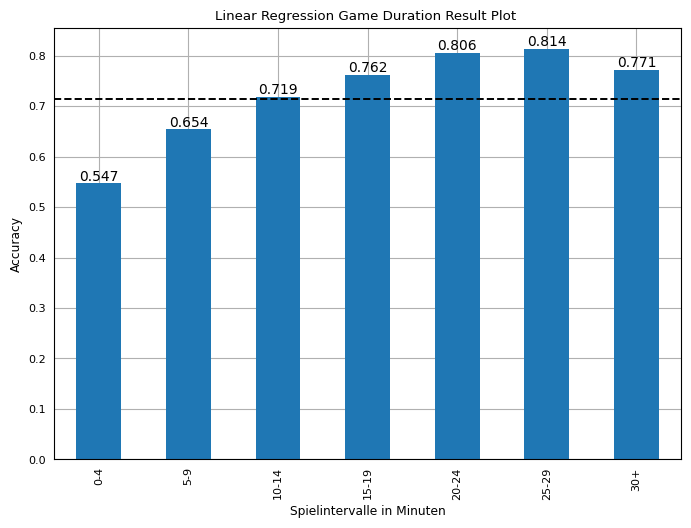

In [10]:
overall_result = accuracy_score(y_test["winningTeam"], y_pred.round())

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
ax = df_lr_results.plot(kind='bar', title='Linear Regression Game Duration Result Plot ', xlabel="Spielintervalle in Minuten", ylabel="Accuracy", legend=False)
ax.set_xticklabels(df_lr_results.x_ticks)
ax.axhline(overall_result, color="black", linestyle="--")
ax.bar_label(ax.containers[0])
for text in ax.texts:
    t = float(text.get_text())                 
    text.set_text(round(t, 3))


## Random Forrest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train["winningTeam"])
y_pred = rfc.predict(x_test)

In [13]:
print('Model accuracy score with Random-Forest-Classifier : {0:0.4f}'. format(accuracy_score(y_test["winningTeam"], y_pred)))

Model accuracy score with Random-Forest-Classifier : 0.7569


In [14]:
#create array with results
results = np.empty(7)

y_pred_4 = rfc.predict(x_test_0_4)
results[0] = accuracy_score(y_test_0_4, y_pred_4.round())
y_pred_9 = rfc.predict(x_test_5_9)
results[1] = accuracy_score(y_test_5_9, y_pred_9.round())                            
y_pred_14 = rfc.predict(x_test_10_14)
results[2] = accuracy_score(y_test_10_14, y_pred_14.round())
y_pred_19 = rfc.predict(x_test_15_19)
results[3] = accuracy_score(y_test_15_19, y_pred_19.round())
y_pred_24 = rfc.predict(x_test_20_24)
results[4] = accuracy_score(y_test_20_24, y_pred_24.round())
y_pred_29 = rfc.predict(x_test_25_29)
results[5] = accuracy_score(y_test_25_29, y_pred_29.round())
y_pred_30_and_more = rfc.predict(x_test_30_34)
results[6] = accuracy_score(y_test_30_34, y_pred_30_and_more.round())


#create df with results
#x_ticks = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

df_lr_results = pd.DataFrame(results)
df_lr_results["x_ticks"] = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

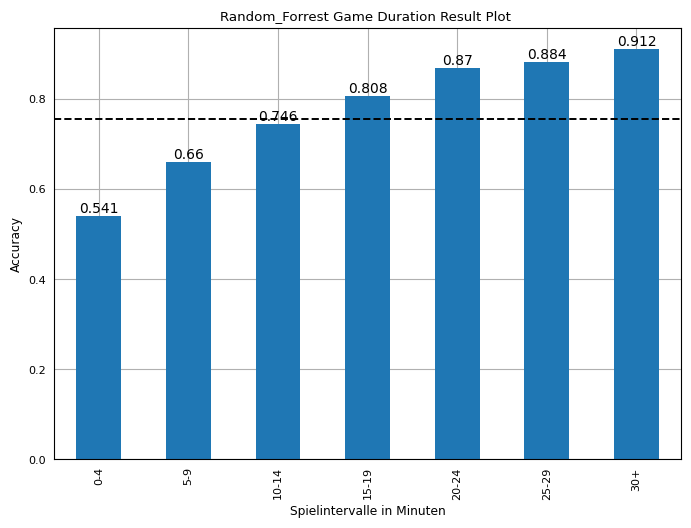

In [15]:
overall_result = accuracy_score(y_test["winningTeam"], y_pred.round())

plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
ax = df_lr_results.plot(kind='bar', title='Random_Forrest Game Duration Result Plot ', xlabel="Spielintervalle in Minuten", ylabel="Accuracy", legend=False)
ax.set_xticklabels(df_lr_results.x_ticks)
#ax.set_yticklabels(np.arange(0, 1, step=0.1))
ax.axhline(overall_result, color="black", linestyle="--")
ax.bar_label(ax.containers[0])

for text in ax.texts:
    t = float(text.get_text())                 
    text.set_text(round(t, 3))